# Human Ressources Analytics 2

The objective is to understand who are the employees who stay in the company and those who leave the company. The dataset contains more employees and an outcome variable ('left') which tells if the employee actually left or not.

**Loading csv files**

In [1]:
HR2 <- read.csv("data/DATA_3.02_HR2.csv")
head(HR2)

,S,LPE,NP,ANH,TIC,Newborn,left
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,0.38,0.53,2,157,3,0,1
2,0.80,0.86,5,262,6,0,1
3,0.11,0.88,7,272,4,0,1
4,0.72,0.87,5,223,5,0,1
5,0.37,0.52,2,159,3,0,1
6,0.41,0.50,2,153,3,0,1


**Exploring the Data**

In [2]:
str(HR2)

'data.frame':	12000 obs. of  7 variables:
 $ S      : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ LPE    : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ NP     : int  2 5 7 5 2 2 6 5 5 2 ...
 $ ANH    : int  157 262 272 223 159 153 247 259 224 142 ...
 $ TIC    : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Newborn: int  0 0 0 0 0 0 0 0 0 0 ...
 $ left   : int  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
summary(HR2)

       S               LPE               NP             ANH       
 Min.   :0.0900   Min.   :0.3600   Min.   :2.000   Min.   : 96.0  
 1st Qu.:0.4800   1st Qu.:0.5700   1st Qu.:3.000   1st Qu.:157.0  
 Median :0.6600   Median :0.7200   Median :4.000   Median :199.5  
 Mean   :0.6295   Mean   :0.7166   Mean   :3.802   Mean   :200.4  
 3rd Qu.:0.8200   3rd Qu.:0.8600   3rd Qu.:5.000   3rd Qu.:243.0  
 Max.   :1.0000   Max.   :1.0000   Max.   :7.000   Max.   :310.0  
      TIC           Newborn            left       
 Min.   :2.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:2.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :3.000   Median :0.0000   Median :0.0000  
 Mean   :3.229   Mean   :0.1542   Mean   :0.1667  
 3rd Qu.:4.000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :6.000   Max.   :1.0000   Max.   :1.0000  

We can see that almost 17% of the employees left the company. Employees have been in the company for 3.2 years on average.

* Frequencies for the left variable:

In [4]:
table(HR2$left) 


    0     1 
10000  2000 

2000 employees left the company.

* Percentages for the left variable:

In [5]:
table(HR2$left)/nrow(HR2)


        0         1 
0.8333333 0.1666667 

17% of the employees left the company.

**Histogram**

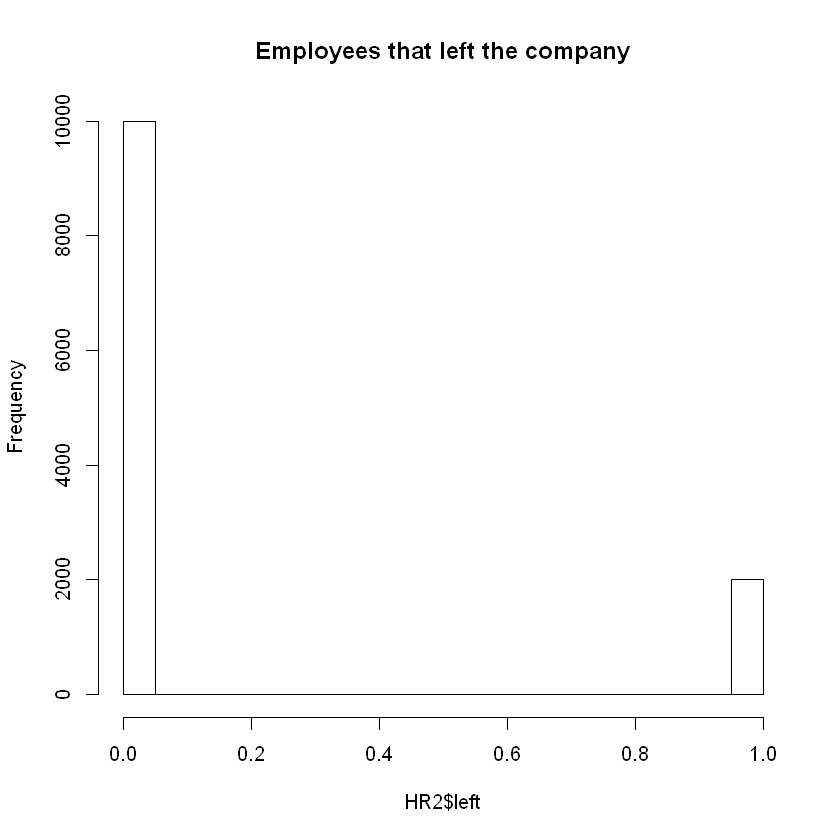

In [6]:
hist(HR2$left, main = "Employees that left the company")

**Pearson correlation coefficient of all variables**

In [7]:
cor(HR2)

,S,LPE,NP,ANH,TIC,Newborn,left
S,1.000000000,0.095705002,-0.13243230,-0.005705901,-0.21527671,0.040262545,-0.35153202
LPE,0.095705002,1.000000000,0.27122611,0.265484215,0.12270940,-0.005377101,0.01183813
NP,-0.132432303,0.271226107,1.00000000,0.332509781,0.24913205,-0.005232970,0.02888289
ANH,-0.005705901,0.265484215,0.33250978,1.000000000,0.13487384,-0.012538743,0.06859937
TIC,-0.215276710,0.122709405,0.24913205,0.134873841,1.00000000,-0.020568143,0.27475630
Newborn,0.040262545,-0.005377101,-0.00523297,-0.012538743,-0.02056814,1.000000000,-0.12590876
left,-0.351532025,0.011838132,0.02888289,0.068599368,0.27475630,-0.125908759,1.00000000


This gives the strength and the direction of the linear relationship between 2 variables. For example, satisfation is negatively correlated with the left variable, everything else being the same.

However, we are looking at the relationship between 'left' and the other variables, but separately. We want to understand how they interact wich each other. To that extent, we build a logistic regression model:

In [8]:
logreg <- glm(left ~ ., family=binomial(logit), data=HR2) 

The fitted values are the output of the model. In the case of a logistic regression, the output is a probability (i.e., p(leaving)).

Let's assess how the model is performing (on the training set) by computing the correlation between predicted attrition and actual:

In [9]:
cor(logreg$fitted.values,HR2$left)

[1] 0.4052017

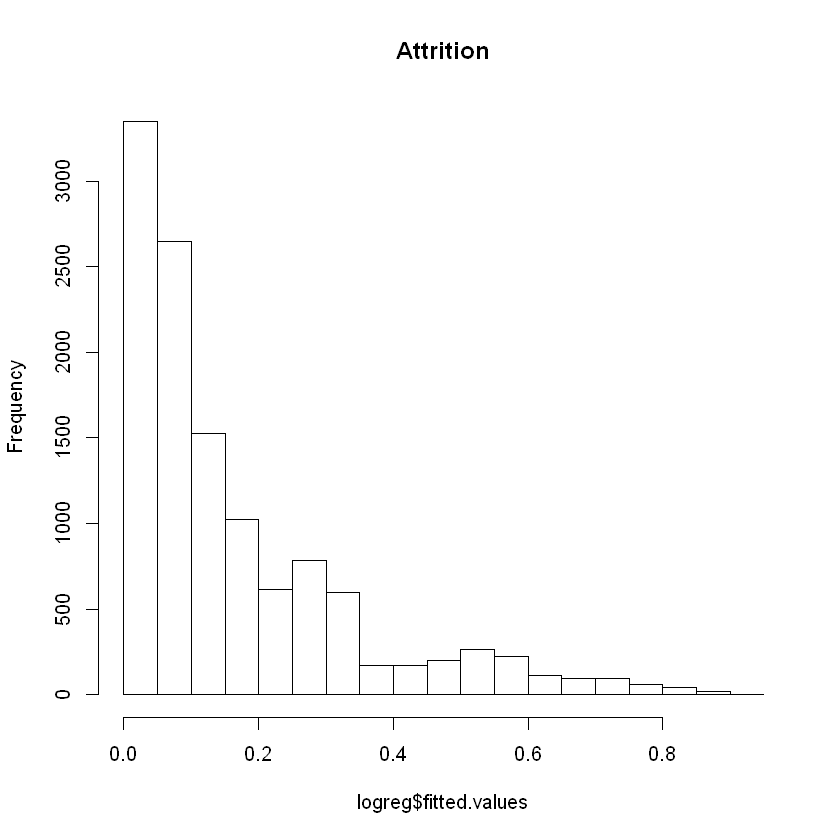

In [10]:
hist(logreg$fitted.values, main = "Attrition")

The correlation is 0.41. That's a positive linear relationship.

Let's define a cutoff for the probability p(leaving), above which an employee is predicted to leave, and below which an employee is predicted to stay:

In [11]:
cutoff <- 0.50

**confusion matrix:**

In [12]:
table(logreg$fitted.values >= cutoff, HR2$left)

       
           0    1
  FALSE 9464 1619
  TRUE   536  381

**Rows are the fitted valued and columns are the actual values.** 

9464 employees were predicted to stay (FALSE), and indeed stayed (0).

1619 employees were predicted to stay (FALSE), but they left the company (1).

536 employees were predicted to leave (TRUE), but they stayed (0).

381 employees were predicted to leave (TRUE), and indeed they left (1).

**Percentage of correctly classified employees who stayed** (i.e., the actual is 0 and the model predicted FALSE):

In [13]:
sum((logreg$fitted.values<=cutoff) & (HR2$left==0)) / sum(HR2$left==0)

[1] 0.9464

**Percentage of correctly classified employees who left** (i.e., the actual is 1 and the model predicted TRUE):

In [14]:
sum((logreg$fitted.values>cutoff) & (HR2$left==1)) / sum(HR2$left==1)

[1] 0.1905

**Overall percentage of correctly classified employees** (to the total number of employees):

In [15]:
mean((logreg$fitted.values>cutoff) == (HR2$left==1))

[1] 0.8204167

The model's accuracy is 82%.

**Estimated % of employee likely to stay:**

In [16]:
sum(logreg$fitted.values <= cutoff) / length(logreg$fitted.values)

[1] 0.9235833

**Estimated % of employee likely to leave:**

In [17]:
sum(logreg$fitted.values > cutoff) / length(logreg$fitted.values)

[1] 0.07641667

Note about the cutoff value:

* if cutoff is high (0.7), the % of correctly classified employees who stayed is higher, whereas the % of correctly classified employees who left is lower. And the overall % of correctly classified employees decreased. Hence, we rarely predict the outcome (ie that the employee is leaving). But this allows us to identify the employees most likely to leave. And we can take preventive actions for these people.


* if cutoff is low (0.3), the % of correctly classified employees who stayed is lower, whereas the % of correctly classified employees who left is higher. And the overall % of correctly classified employees increased. Hence, we rarely predict that the employee is staying. And we make more errors in predicting the departure of an employee (he or she actually didn't leave). But this allows us to identify employees who might leave. And we can take preventive actions for these people.

Now, let's observe the model summary to see the importance of factors:

In [18]:
summary(logreg)


Call:
glm(formula = left ~ ., family = binomial(logit), data = HR2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1727  -0.5410  -0.3535  -0.1994   3.0949  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.2412448  0.1601334  -7.751 9.09e-15 ***
S           -3.8163201  0.1207448 -31.607  < 2e-16 ***
LPE          0.5044011  0.1809102   2.788   0.0053 ** 
NP          -0.3591952  0.0264709 -13.569  < 2e-16 ***
ANH          0.0037840  0.0006237   6.067 1.30e-09 ***
TIC          0.6187913  0.0271161  22.820  < 2e-16 ***
Newborn     -1.4851023  0.1128772 -13.157  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10813.5  on 11999  degrees of freedom
Residual deviance:  8508.9  on 11993  degrees of freedom
AIC: 8522.9

Number of Fisher Scoring iterations: 6


Per the p-values, all predictors are statistically significant. To rank their importance, we look at the absolute value of the Z-value. It appears here that the satisfaction level (S) is the most important driver. The effect of satisfaction is negative on attrition (estimate < 0), and positive for the business. In other words, the larger the satisfaction, the smaller the probability to leave (ie the highest the probability to stay), everything else being equal.

### Effect of one of the most important driver: the time spent in the company

Let's use a more visual way to see the effect of one of the most important driver: TIC, the total time spent in the company

In [19]:
library(ggplot2)

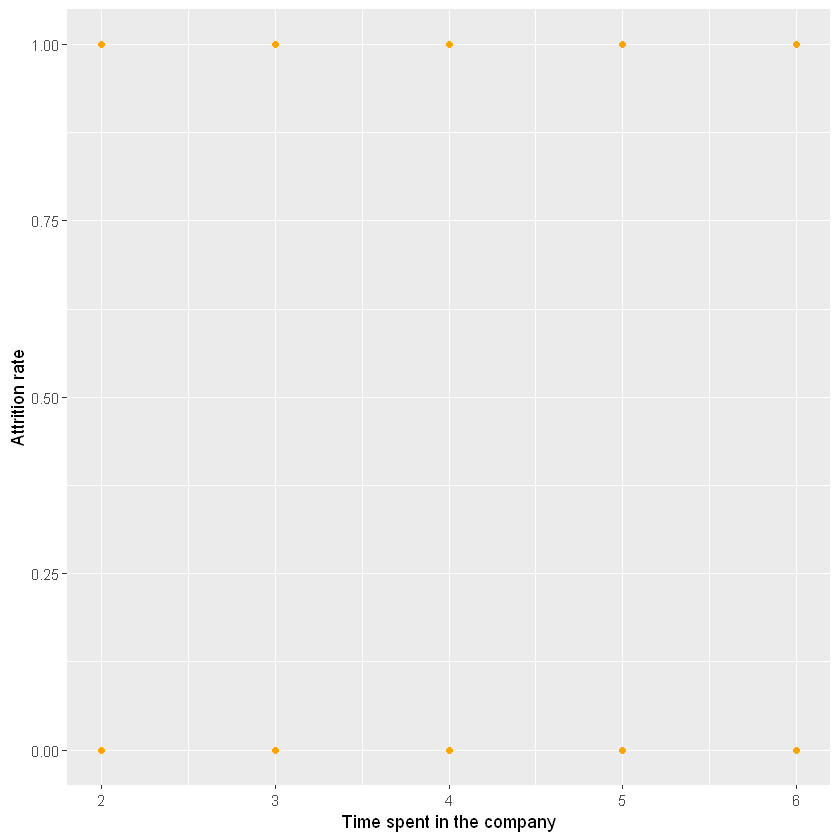

In [20]:
ggplot(data=HR2, aes(x=TIC,y=left)) + 
  geom_point(color='orange') +
  xlab("Time spent in the company") +
  ylab("Attrition rate") 

#### An aggregated plot of the attrition

Since the outcome variable ('left') is binary (0 or 1) with a lot of overplotting, we could plot instead the proportion of leavers, as a function of time:

In [21]:
# computes the average attrition rate for each value of TIC. (We want to aggregate 'left' as a function of TIC)
aggbTimeRank <- aggregate(left ~ TIC, data=HR2, FUN=mean) 

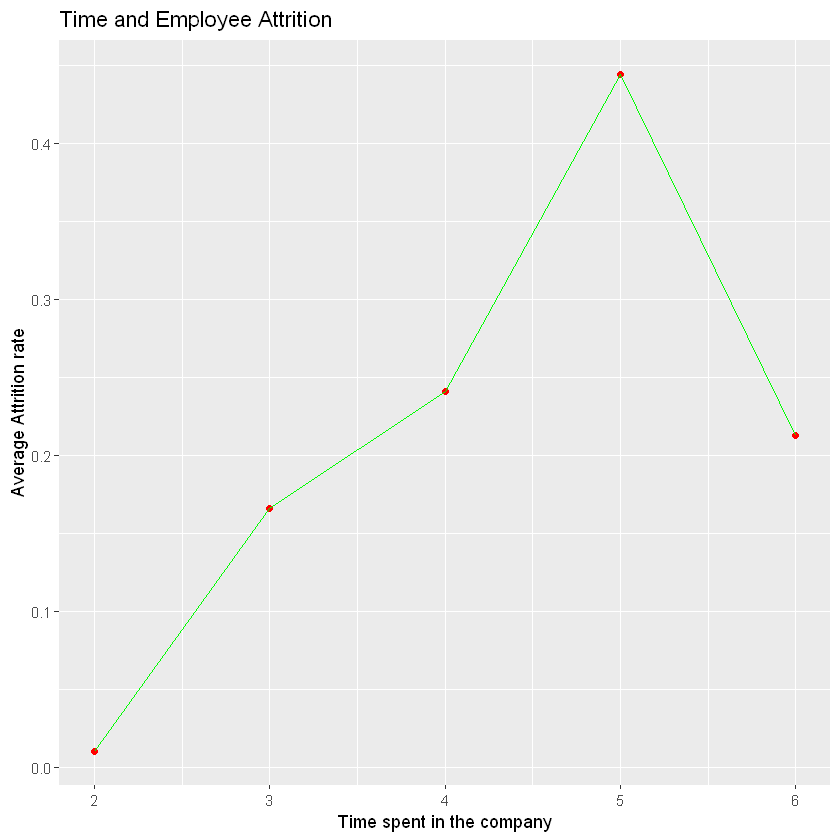

In [22]:
ggplot(data=aggbTimeRank, aes(x=TIC,y=left)) + 
  geom_point(color='red') + geom_line(color='green') +
  xlab("Time spent in the company") +
  ylab("Average Attrition rate") +
  ggtitle("Time and Employee Attrition")

The average attrition rate increases up to year 5, then it decreases sharply. Let's investigate further. Let's compare the value to the number of employee in each group.

#### An aggregated plot of the attrition (with employee count)

In addition to the chart above, let's computes the number of employees for each value of TIC:

In [23]:
# computes the number of employees for each value of TIC
cntbTimeRank <- aggregate(left ~ TIC, data=HR2, FUN=length) 
cntbTimeRank

TIC,left
<int>,<int>
2,3021
3,5322
4,2060
5,1085
6,512


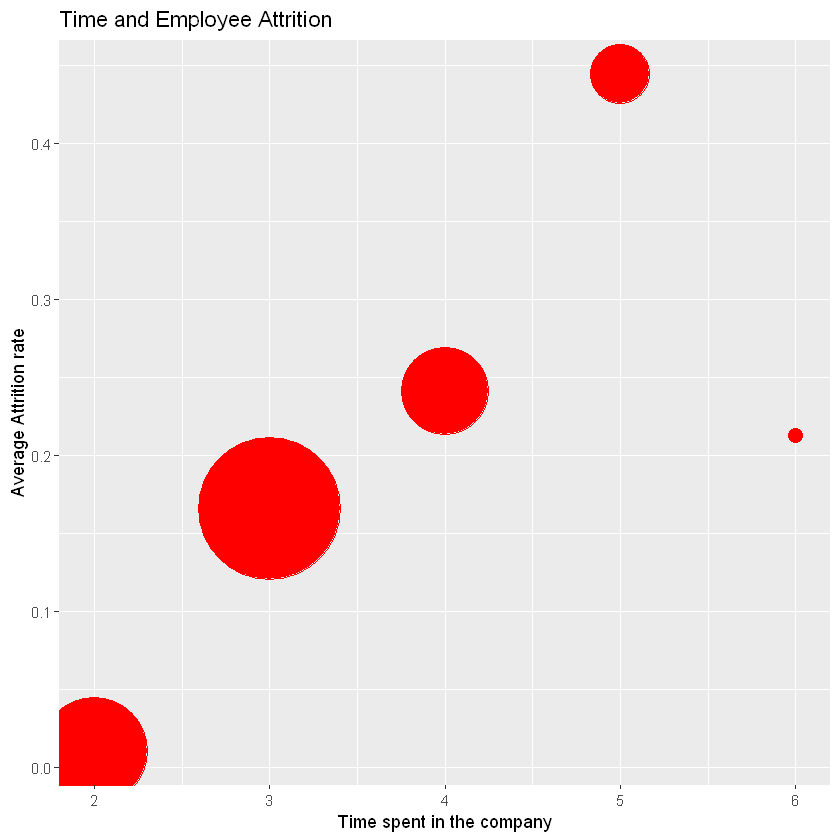

In [24]:
ggplot(data=aggbTimeRank, aes(x=TIC,y=left)) + 
  geom_point(color='red', aes(size = cntbTimeRank$left)) +
  xlab("Time spent in the company") +
  ylab("Average Attrition rate") +
  ggtitle("Time and Employee Attrition") +
  scale_size_continuous(guide=FALSE, range = c(4,40)) # point's size will be between 4 and 40

# or
#symbols(aggbTimeRank$TIC,aggbTimeRank$left,
#        circles=cntbTimeRank$left, inches=.75, fg="white", bg="red",
#        main= "Time and Employee Attrition", 
#        ylab="Average Attrition Rate", xlab= "Time spent")

The average attrition rate increases up to year 5, then it decreases sharply. It concerns 512 people, which is still a lot and should be reported to decision makers.

#### Effect of the most important driver: the satisfaction

Let's see if we can find some insights that would allow us to retain more employees.

First we want to limit the number of values that can be taken by satisfaction. Then we can rank the satisfaction variable from the smallest (rank=1) to largest (rank=20)

In [25]:
tempdata <- HR2

tempdata$rankSatis <- cut(tempdata$S, breaks = seq(0.0, 1.0, by = .05), labels = 1:20)
# 0.0-0.05 satisfaction has rank 0 ; 0.95-1.0 satisfaction has rank 20

table(tempdata$rankSatis)


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0 314 390 291 264 145 194 585 615 595 807 859 857 849 954 939 928 869 794 751 

Similarly as we did before, we compute the average attrition rate for each category and number of employees for each value of TIC:

In [26]:
# We compute the average attrition rate for each category
aggbSatisRank <- aggregate(left ~ rankSatis, data=tempdata, FUN=mean)

# We compute the number of employees for each value of TIC
cntbSatisRank <- aggregate(left ~ rankSatis, data=tempdata, FUN=length)

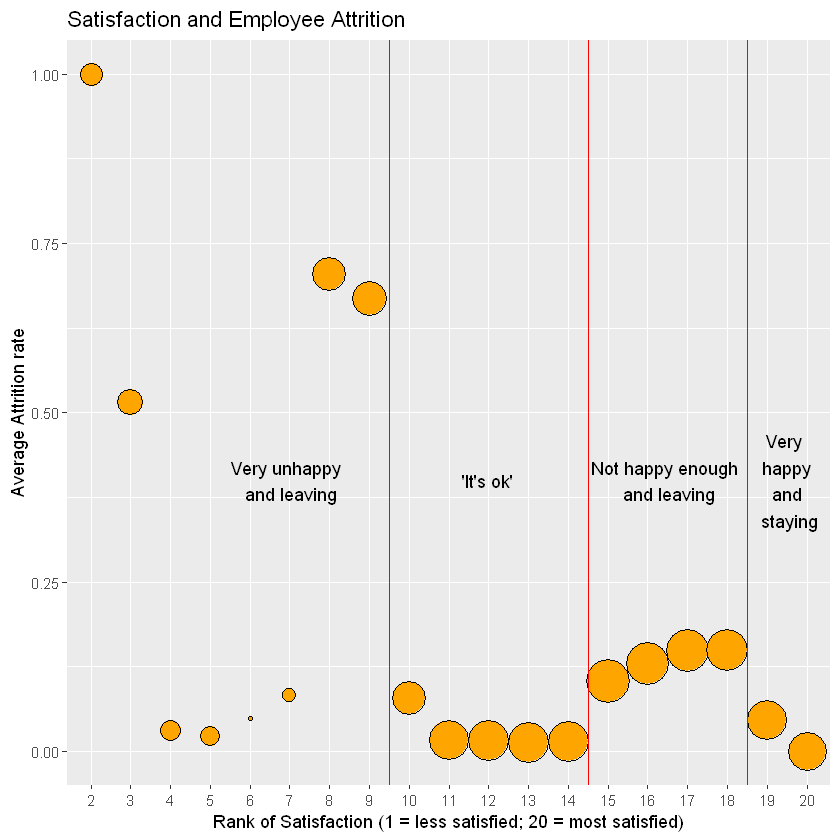

In [27]:
ggplot(data=aggbSatisRank, aes(x=rankSatis,y=left)) + 
  geom_point(colour = "black", fill = "orange", shape = 21, aes(size = cntbSatisRank$left)) +  # shape 21 has a border 
  xlab("Rank of Satisfaction (1 = less satisfied; 20 = most satisfied)") +
  ylab("Average Attrition rate") +
  ggtitle("Satisfaction and Employee Attrition") +
  scale_size_continuous(guide=FALSE, range = c(1,12)) + # point's size will be between 4 and 40
  geom_vline(xintercept = 8.5, color='red') +
  geom_vline(xintercept = 13.5, color='red') +
  geom_vline(xintercept = 17.5, color='red') +
  annotate("text", x = 6, y = 0.4, label = "Very unhappy \n and leaving", color='black') +
  annotate("text", x = 11, y = 0.4, label = "'It's ok'", color='black') +
  annotate("text", x = 15.5, y = 0.4, label = "Not happy enough \n and leaving", color='black') +
  annotate("text", x = 18.5, y = 0.4, label = "Very \n happy \n and \n staying", color='black')

# or
#symbols(aggbSatisRank$rankSatis,aggbSatisRank$left,
#        circles=cntbSatisRank$left, inches=.2, fg="white", bg="red",
#        main= "Satisfaction and Employee Attrition", 
#        ylab="Average Attrition Rate", xlab= "Rank of Satisfaction")

Rank 1 to 9: the happy people who wants to stay.

Rank 10 to 14: the 'it's ok' people who are staying.

Rank 15 to 18: the happy people who wants to leave -> this is something we want to investigate further. Maybe they are burned out? Or hired by clients? These are the people you want to target when undertaking retaining actions.

Rank 19-20: the unhappy people that indeed want to leave.